Daniel Diamont (dd28977)
John Sigmon (js85773)

# Library Imports

In [194]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import sklearn as sk

# algorithms and helpers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Thursday, October 25th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1a - Stochastic Gradient Descent (25pts)

1. (4pts) Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.

ANSWER

2. (12pts) Write Python code for an SGD solution to the non-linear model $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).

In [20]:
class SGD:
    
    def __init__(self, learning_rate=0.5, regularization_constant=0, epochs=15):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.epochs = epochs
    
    def fit(self, X, z, update_rule='sgd'):
        W = np.random.uniform(size=(X.shape[1],))
        
        self.update_rule = update_rule
        self.X = X
        self.y = z
        
        loss_hist = []
        
        for epoch in np.arange(0, epochs):

            preds = activation(pointX * W)

            #         if(update_rule is 'sgd'):
            #             sse = 

            #         if(update_rule is 'sgd_momentum'):

            #         if(update_rule is 'rmsprop'):

            error = preds - pointY

            loss = np.sum(error ** 2)

            gradient = pointX * (error)

            W += -learning_rate * gradient

            loss_hist.append(loss)
            
        
    def get_params():
        return W
    
    def predict(self, X):
        return W.T.dot(X)
        
    def activation(x):
        return 1.0 / (1 + np.exp(-x))
 
    def next_datapoint(X, y):
        yield(np.random.choice(X), np.random.choice(y))

4. (2pts) Report the MSE at the end of 15 epochs for both combinations.

5. (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?


6. Now consider the following 2x2x1 network with one hidden layer. The input layer has two nodes, and the output layer has one node.

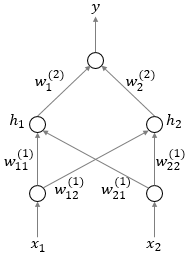

Both hidden layer units use a *sigmoid* activation function, and the output unit uses an identity activation (i.e. the output is just a weighted sum of the inputs).

(a) (2pts) Write the output $y$ as a function of the inputs $x_1$ and $x_2$.

(b) (2pts) Derive the update rule for the layer-one weight $w_{12}^{(1)}$.

# Notes on SGD with momentum
Momentum helps accelerate SGD in relevant direction and dampens the oscillations. It tries to maintain the direction in which the gradient vector was already pointing and adjusts the direction slowly with the new gradients. The steps can be listed below :
1. v[t] = mu * v[t-1] - (learning_rate)*(gradient)
2. w = w + v

Set mu = 0.90. Initialize v with zeros.


# Notes on RMSProp
RMSProp (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.  In particular, it uses a moving average of squared gradients as cache. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = (decay_rate)*(cache) + (1 - decay_rate)*(gradients^2) 
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

Use decay_rate = 0.90. Initialize cache with zeros.

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

## Answer

# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.as_matrix()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181200, 14) (181200,) (60400, 14) (60400,)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.
   
   
2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.


3) (5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using below conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* valu;:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

## Answer

# Question 3 - [Kaggle Competition] Nomad2018 Predicting Transparent Conductors (25 pts)

In this problem, we are going to explore a Kaggle competition: [Transparent Conductors](https://www.kaggle.com/c/nomad2018-predict-transparent-conductors). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any skewed features and consider applying suitable transformation techniques to make them more "normal").
 * Impute the missing values (if any).
 * Create new features using interactions
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression, and multilayer perceptron.  For Lasso and Ridge regression, optimize the alphas using cross validation. For the MLP model, you can use one hidden layer. You may try other predictive models to get better scores (optional).
3. Get a score of 0.0800 or lower on the Private Leaderboard. Take a screenshot of your private leaderboard after submission as proof. You can also click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

## Answer

#### Part 1 Preprocessing

In [14]:
# Download data and unzip it
%%sh
DATADIR="data"
# Alternativey place all.zip inside hw3 directory if you don't have Kaggle API installed
#kaggle competitions download -c nomad2018-predict-transparent-conductors 
ls
unzip -d $DATADIR/ all.zip
rm all.zip
cd $DATADIR
unzip test.zip
unzip train.zip
rm *.zip
rm -rf *MACOSX
cd ../

rm: cannot remove 'all.zip': No such file or directory
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.
unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.
rm: cannot remove '*.zip': No such file or directory


In [32]:
data_path = 'data'
train_fname = 'train.csv'
test_fname = 'test.csv'
labels = ['formation_energy_ev_natom', 'bandgap_energy_ev']

In [179]:
train = pd.read_csv(os.path.join(data_path, train_fname))
test = pd.read_csv(os.path.join(data_path, test_fname))

In [180]:
train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [181]:
train_labels = train[labels]
train_data = train.drop(columns=[*labels, 'id'])

In [199]:
test_data = test.drop(columns=['id'])

First check for missing values.

In [62]:
train_data.isnull().values.any()

False

That's weird, check the labels also.

In [63]:
train_labels.isnull().values.any()

False

OK, then let's take a look at the data distributions.

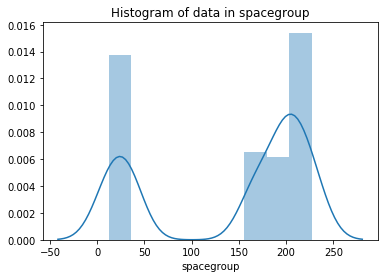

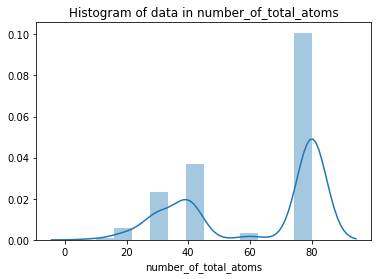

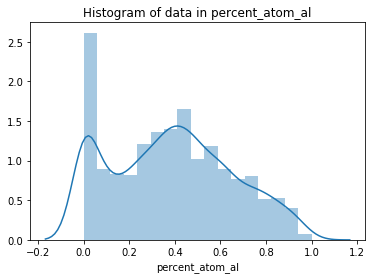

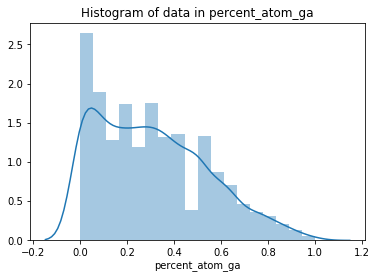

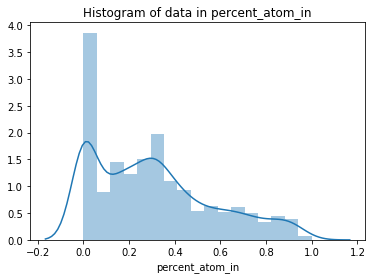

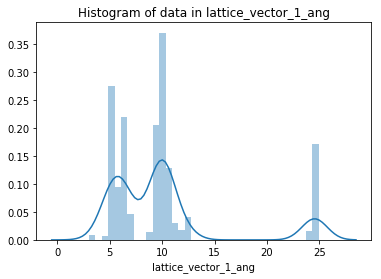

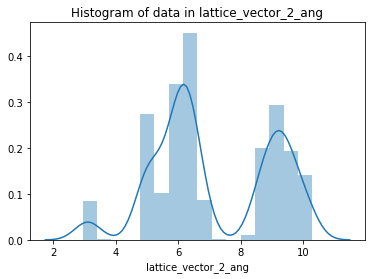

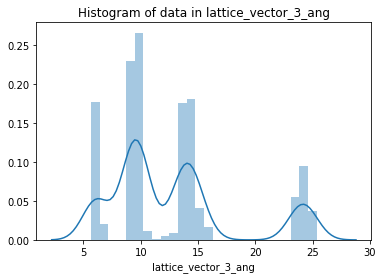

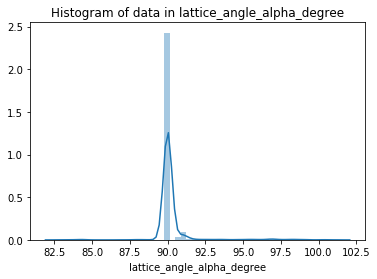

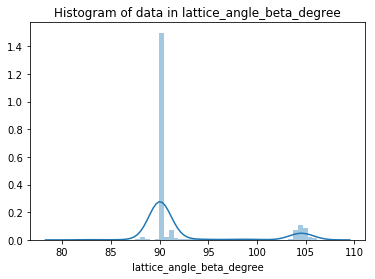

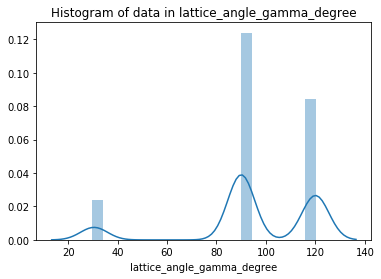

In [61]:
for col in train_data.columns:
    _ = plt.title('Histogram of data in {}'.format(col))
    sns.distplot(train_data[col])
    plt.show()

We are just going to throw all of these columns into the StandardScaler.

In [77]:
scaler = StandardScaler()
_ = scaler.fit(train_data)
train_data_scaled = pd.DataFrame(
                        data=scaler.transform(train_data),
                        index=train['id'],
                        columns=train_data.columns
)

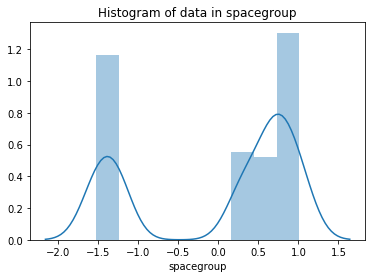

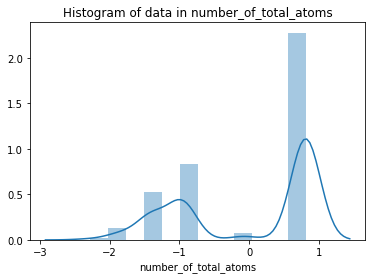

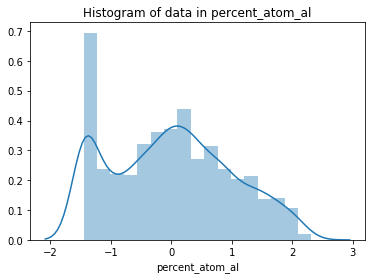

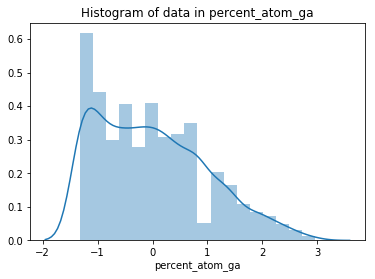

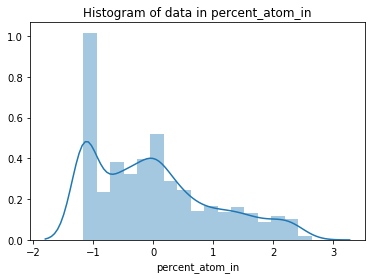

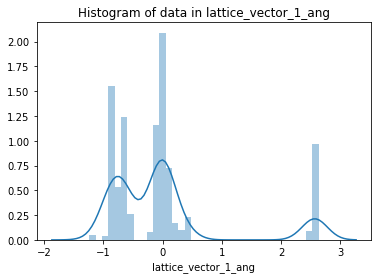

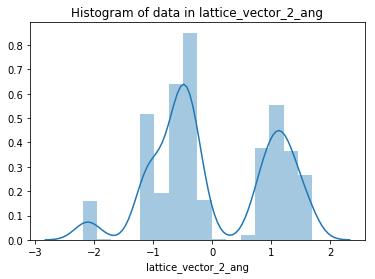

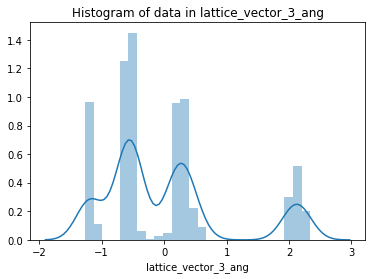

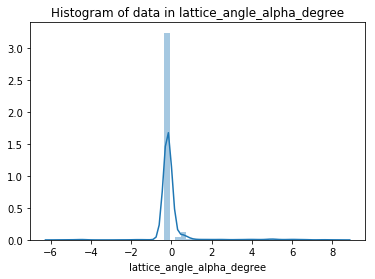

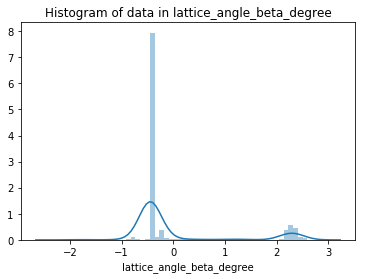

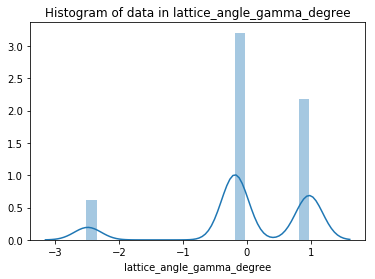

In [79]:
for col in train_data.columns:
    _ = plt.title('Histogram of data in {}'.format(col))
    sns.distplot(train_data_scaled[col])
    plt.show()

Looks better, now let's get these atom locations loaded.

In [23]:
%%sh
# lines | words | bytes | filename
wc data/test/1/geometry.xyz
wc data/test/47/geometry.xyz

  86  421 5550 data/test/1/geometry.xyz
  86  421 5603 data/test/47/geometry.xyz


In [47]:
%%sh
head data/test/1/geometry.xyz

#=======================================================
#Created using the Atomic Simulation Environment (ASE)
#=======================================================
lattice_vector 10.5378440999999992 -0.0416559800000000 -0.0546684100000000 
lattice_vector 0.0353999200000000 9.0140084100000006 -0.0275333100000000 
lattice_vector 0.0500609000000000 0.0292891200000000 9.6359329900000006 
atom 1.7089214588200001 7.6848373406700006 6.6842861752599996 In
atom 6.9778435088199995 7.6640093506700007 6.6569519702599997 In
atom 3.6401549557799990 1.3345275526100000 1.8753704028000002 In
atom 8.9090770057800004 1.3136995626100001 1.8480361978000002 In


In [186]:
num_train_data_points = len(train)
num_test_data_points = len(test)
num_geometry_data_points = 83
size_geometry_data_point = 3

In [187]:
train_data_geometry = np.empty(
    (num_train_data_points, 
     num_geometry_data_points, 
     size_geometry_data_point)
)
test_data_geometry = np.empty(
    (num_train_data_points, 
     num_geometry_data_points, 
     size_geometry_data_point)
)

In [190]:
for data_point in range(num_train_data_points):
    path_to_geometry_file = os.path.join(data_path, 'train', str(data_point + 1))
    with open(path_to_geometry_file + '/geometry.xyz', 'rb') as f:
        lines = f.read().splitlines()
    lines = lines[3:]
    for idx, line in enumerate(lines):
        line = line.split()[1:]
        if len(line) is 4:
            line = line[:-1]
        train_data_geometry[data_point, idx, :] = np.array(line)

for data_point in range(num_test_data_points):
    path_to_geometry_file = os.path.join(data_path, 'test', str(data_point + 1))
    with open(path_to_geometry_file + '/geometry.xyz', 'rb') as f:
        lines = f.read().splitlines()
    lines = lines[3:]
    for idx, line in enumerate(lines):
        line = line.split()[1:]
        if len(line) is 4:
            line = line[:-1]
        test_data_geometry[data_point, idx, :] = np.array(line)

We could do PCA on these vectors, but the weights learned by an autoencoder will span the same subspace as the PCA transformation, and it is non-linear and therefore more powerful.

In [69]:
# For Linux, Python 3.5, and no CUDA
!pip3 install http://download.pytorch.org/whl/cpu/torch-0.4.1-cp35-cp35m-linux_x86_64.whl 2>1 /dev/null
!pip3 install torchvision 2>1 /dev/null

In [115]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [125]:
epochs = 100
batch_size = 256
lr = 0.01
input_size = train_data_geometry.shape[1]*train_data_geometry.shape[2]

class GeometryDataset(Dataset):
    def __init__(self, train_data_geometry):
        self.data = train_data_geometry.reshape(
            len(train_data_geometry), input_size)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
        
dataset = GeometryDataset(train_data_geometry)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=8)

In [150]:
model = torch.nn.Sequential(
    torch.nn.Linear(input_size, 3),
    torch.nn.ELU(),
    torch.nn.Linear(3, input_size),
    torch.nn.ELU()
)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.MSELoss()
INF = 99999
stopping_epsilon = 0.1
stop = False

early_stopping = [INF]
for _ in range(epochs):
    for i, batch in enumerate(dataloader, 0):
        y_pred = model(batch.float())
        loss = criterion(y_pred, batch.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if early_stopping[-1] < loss.data[0] + stopping_epsilon:
        early_stopping.append(loss.data[0])
        break
    else:
        early_stopping.append(loss.data[0])
    print("Epoch:\t{}\nLoss:\t{}".format(_, loss.data[0]))

Epoch:	0
Loss:	27.27212142944336
Epoch:	1
Loss:	24.946989059448242
Epoch:	2
Loss:	20.28445053100586
Epoch:	3
Loss:	18.69547462463379
Epoch:	4
Loss:	15.803351402282715
Epoch:	5
Loss:	13.534912109375
Epoch:	6
Loss:	13.274330139160156
Epoch:	7
Loss:	12.985692024230957
Epoch:	8
Loss:	12.326662063598633


In [174]:
W = list(model[0].parameters())[0].detach().numpy()
b = list(model[0].parameters())[1].detach().numpy()
print(W.shape)
print(b.shape)

(3, 249)
(3,)


Now lets transform the geometry data and add to the dataframe.

In [191]:
def elu(X, alpha=1):
    return np.where(X < 0, alpha * (np.exp(X) - 1), X)

# Transform training data
features_to_add_train = np.empty((num_train_data_points, 3))
for idx in range(num_train_data_points):
    features_to_add_train[idx] = elu(np.matmul(W, train_data_geometry[idx].flatten()) + b)
    
# Transform test data
features_to_add_test = np.empty((num_test_data_points, 3))
for idx in range(num_test_data_points):
    features_to_add_test[idx] = elu(np.matmul(W, test_data_geometry[idx].flatten()) + b)

In [195]:
features_to_add_train.shape
features_to_add_test.shape

(2400, 3)

(600, 3)

In [196]:
for idx in range(3):
    train_data['geo-{}'.format(idx)] = features_to_add_train[:, idx]
    test_data['geo-{}'.format(idx)] = features_to_add_test[:, idx]

In [200]:
train_data.columns
test_data.columns

Index(['spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'geo-0', 'geo-1', 'geo-2'],
      dtype='object')

Index(['spacegroup', 'number_of_total_atoms', 'percent_atom_al',
       'percent_atom_ga', 'percent_atom_in', 'lattice_vector_1_ang',
       'lattice_vector_2_ang', 'lattice_vector_3_ang',
       'lattice_angle_alpha_degree', 'lattice_angle_beta_degree',
       'lattice_angle_gamma_degree', 'geo-0', 'geo-1', 'geo-2'],
      dtype='object')

#### Training Ridge, Lasso, MLP

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

## Answer